***
# <font color=royalblue size=10>INTRODUÇÃO</font>
***
- Arquivo	: notebook.ipynb
- Título	: Exercício 7 - Disciplina de Redes Neurais Artificiais (DELT/UFMG)
- Autor	    : Gustavo Augusto Ortiz de Oliveira (gstvortiz@hotmail.com) 
- Descrição: O pacote RSNNS (R Stuttgart Neural Networks Simulator) é uma adaptação para a linguagem R do conhecido simulador de redes neurais SNNS, desenvolvido na década de 1990 na Universidade de Stuttgart, na Alemanha. Desde a sua versão original o pacote tem adotado a licença pública GPL (General Public
License), a exemplo de outros pacotes para o R. O pacote RSNNS possui a função mlp que executa o treinamento de uma rede Perceptron de Múltiplas Camadas (MLP - Multi-Layer Perceptron) com exibilidade para mudança na estrutura da rede, parâmetros e funções de treinamento. ***O pacote scikit-learn será utilizado como equivalente ao pacote RSNNS, para a linguagem Python. O objetivo do estudo será estudar o pacote e utilizar a rede para resolução de um problema simples de Regressão.***
***

## [1] BIBLIOTECAS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

***
# <font color=indianred size=10>PRÁTICA DE REGRESSÃO</font>

***

## [1] GERAÇÃO DE DADOS

In [17]:
X = np.linspace(0, 2*np.pi, 100)
y = np.sin(X) + np.random.normal(scale = 0.1, size = 100)
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size = 0.3)

## [2] TREINAMENTO DA REDE

In [20]:
hidden_layer_sizes = (5)
Rede = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation='tanh', solver = 'lbfgs', learning_rate='adaptive', max_iter=1000, tol = 0.001)
Rede.fit(X_train, y_train)
y_pred = Rede.predict(X_test)

## [3] VISUALIZAÇÃO DE RESULTADOS

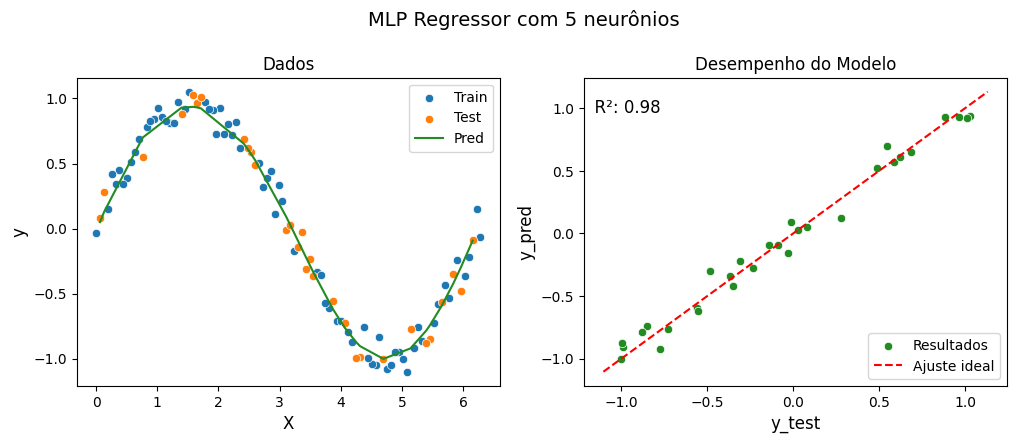

In [21]:
# Criação da Figura
fig, axs = plt.subplots(1, 2, figsize = (12, 4))
fig.suptitle(f'MLP Regressor com {hidden_layer_sizes} neurônios ', fontsize = 14, y = 1.05)

# Personalização do Gráfico 1
sns.scatterplot(x = X_train.ravel(), y = y_train, label = 'Train', ax = axs[0])
sns.scatterplot(x = X_test.ravel(), y = y_test, label = 'Test', ax = axs[0])
sns.lineplot(x = X_test.ravel(), y = y_pred, color = 'forestgreen', label = 'Pred', ax = axs[0])
axs[0].set_title('Dados', fontsize = 12)
axs[0].set_xlabel('X', fontsize = 12)
axs[0].set_ylabel('y', fontsize = 12)

# Personalização do Gráfico 2
sns.scatterplot(x = y_test, y = y_pred, color = 'forestgreen', label = 'Resultados', ax = axs[1])
sns.lineplot(x = axs[1].get_xlim(), y = axs[1].get_xlim(), linestyle = 'dashed', color = 'red', label = 'Ajuste ideal', ax = axs[1])
axs[1].text(s = f'\n  R²: {r2_score(y_test, y_pred):.2f}', x = axs[1].get_xlim()[0], y = axs[1].get_ylim()[1], va = 'top', ha = 'left', fontsize = 12)
axs[1].set_title('Desempenho do Modelo', fontsize = 12)
axs[1].set_xlabel('y_test', fontsize = 12)
axs[1].set_ylabel('y_pred', fontsize = 12)
axs[1].legend(loc='lower right')

## [4] EXPERIMENTOS

Durante algumas experimentações, foi possível perceber a superioridade dos métodos otimizadores da família quasi-Newton, como o *lbfgs*. Portanto, será realizada algumas comparações entre esses métodos, assim como o desempenho a partir número de neurônios.

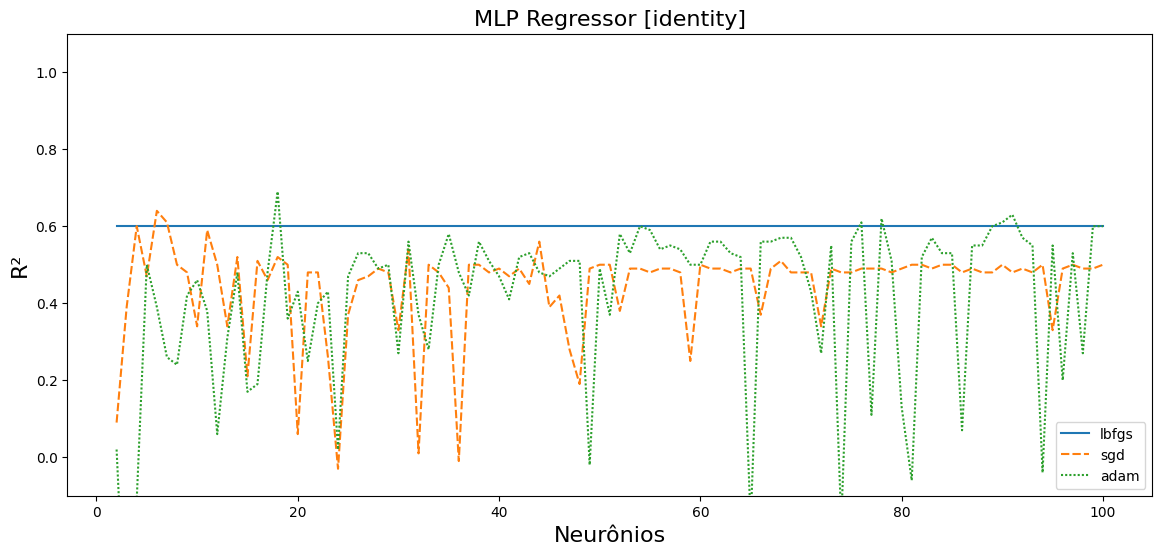

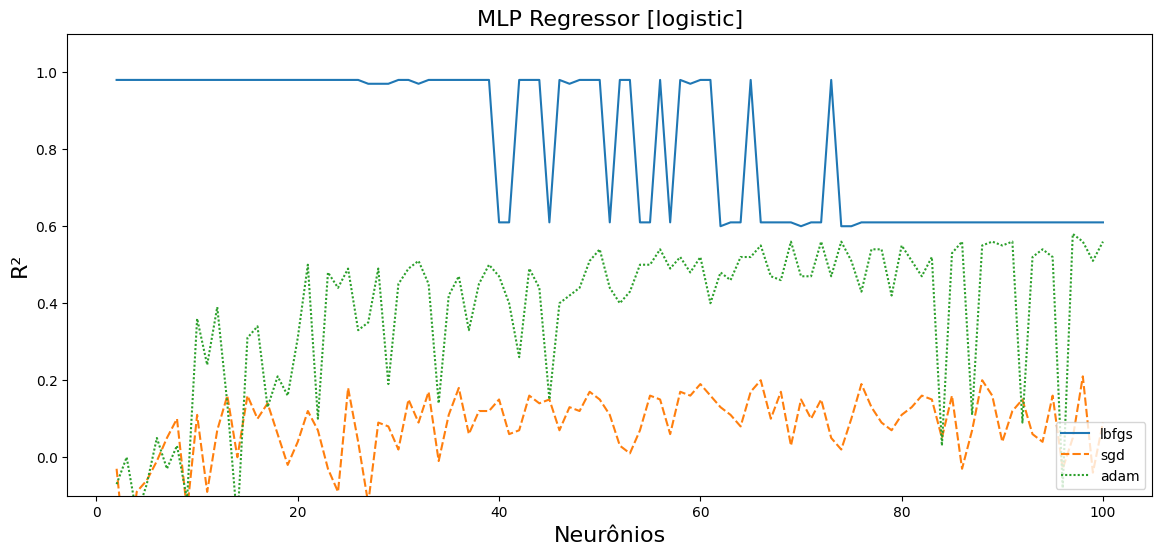

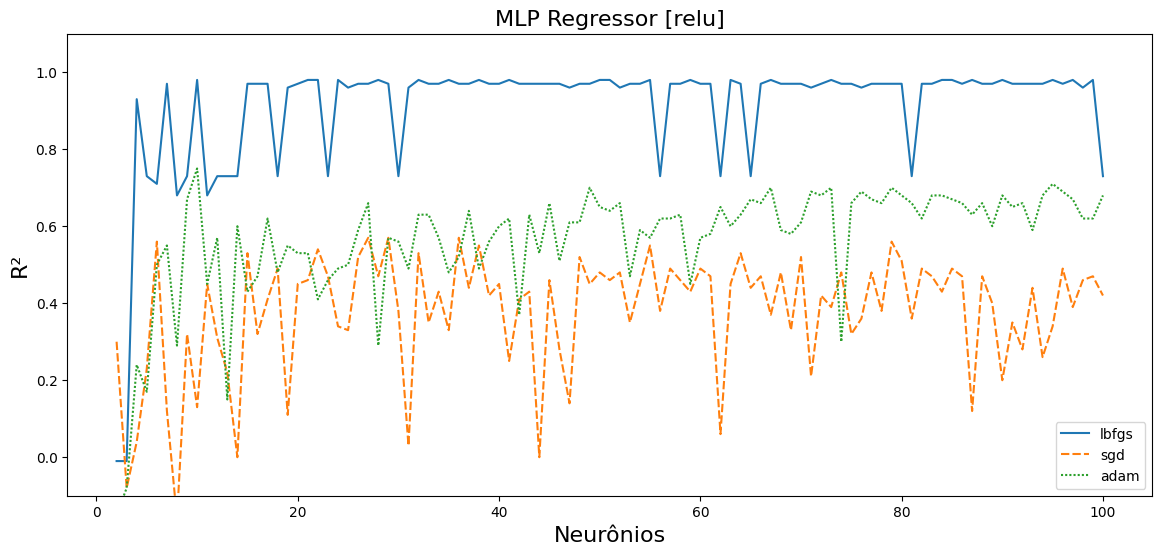

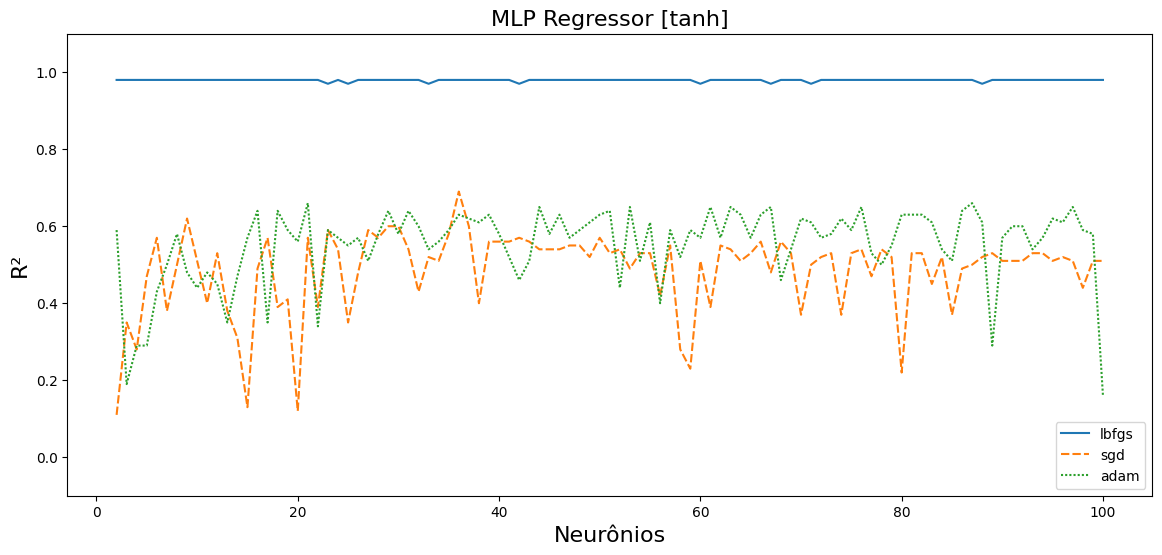

In [5]:
for activation in ['identity', 'logistic', 'relu', 'tanh']:
    metricas = dict()
    for p in range(2, 101):
        metricas[p] = dict()
        for solver in ['lbfgs', 'sgd', 'adam']:
            Rede = MLPRegressor(hidden_layer_sizes=p, activation=activation, solver = solver, learning_rate='adaptive', max_iter=1000, tol = 0.0005)
            Rede.fit(X_train, y_train)
            y_pred = Rede.predict(X_test)
            metricas[p][solver] = r2_score(y_test, y_pred).round(2)
    metricas = pd.DataFrame(metricas).T
    ax = sns.lineplot(metricas)
    ax.figure.set_size_inches(14, 6)
    ax.set_title(f'MLP Regressor [{activation}]', fontsize = 16)
    ax.set_xlabel('Neurônios', fontsize = 16)
    ax.set_ylabel('R²', fontsize = 16)
    ax.legend(loc='lower right')
    ax.set_ylim(-0.1, 1.1)
    plt.show()